Merhaba! Bugün, uluslararası bir e-ticaret şirketinin müşteri bilgilerini içeren ve küresel deniz taşımacılığının dinamiklerini anlamak için kullanılan Shipping veri setinden bahsedeceğim. Bu veri setini kullanarak Lojistik Regresyon modelini uygulayarak temel sonuçlar elde edip tahminler yapacağız.

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

pd.set_option("display.max_column",None)

pd.set_option("display.width",500)



Başlangıç olarak, veri analizi kütüphanelerini ve makine öğrenmesi modelini yüklemek için gerekli adımları gerçekleştiriyorum.

In [2]:
shipping=pd.read_csv("/content/DataSets/shipping.csv")

Burada veri setimin sütunları hakkında bilgiler içerir :

Kimlik: Müşteri Kimlik Numarası.

Depo bloğu: Şirketin A,B,C,D,E gibi bloklara bölünmüş büyük bir deposu bulunmaktadır.

Sevkiyat şekli:Firma, ürünleri Gemi, Uçak ve Karayolu gibi birden fazla yöntemle sevk etmektedir.

Müşteri hizmetleri aramaları: Gönderinin sorgulanması için yapılan aramaların sayısı.

Müşteri derecelendirmesi: Şirket her müşteriden puan aldı. 1 en düşük (En Kötü), 5 en yüksek (En İyi) değeridir.

Ürünün Maliyeti: Ürünün ABD Doları cinsinden maliyeti.

Önceki satın alımlar: Önceki Satın Alma Sayısı.

Ürünün önemi: Şirket, ürünü düşük, orta, yüksek gibi çeşitli parametrelere göre sınıflandırmıştır.

Cinsiyet: Erkek ve Kadın.

Sunulan indirim: Belirli bir üründe sunulan indirim.

Gram cinsinden ağırlık: Gram cinsinden ağırlıktır.

Zamanında Ulaşıldı: Hedef değişken olup, 1 ürünün zamanında ulaşmadığını, 0 ise zamanında ulaştığını belirtir.

In [30]:
print(shipping.head())

    Warehouse_block  Mode_of_Shipment  Customer_care_calls  Customer_rating  Cost_of_the_Product  Prior_purchases  Product_importance  Gender  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N
3                 3                 2                    3                3                  176                4                   2       2                10           1177                    1
5                 1                 2                    3                1                  162                3                   2       1                12           1417                    1
6                 5                 2                    3                4                  250                3                   1       1                 3           2371                    1
8                 2                 2                    3                4                  150                3                   1       1                11           1861                    1
10                4 

Burada da veri setimin çalıştığını görmem için head komutuyula ilk 5 verimi ekrana getiriyorum.

In [31]:
print(shipping.describe())

       Warehouse_block  Mode_of_Shipment  Customer_care_calls  Customer_rating  Cost_of_the_Product  Prior_purchases  Product_importance       Gender  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N
count      7794.000000       7794.000000          7794.000000      7794.000000          7794.000000      7794.000000         7794.000000  7794.000000       7794.000000    7794.000000          7794.000000
mean          2.673980          1.480370             4.144727         2.992302           214.005132         3.292148            1.579933     1.498204          5.722864    3992.363870             0.483705
std           1.489799          0.752556             1.179444         1.412922            48.168493         0.992451            0.629150     0.500029          3.114797    1615.260124             0.499766
min           1.000000          1.000000             2.000000         1.000000            96.000000         2.000000            1.000000     1.000000          1.000000    1001.000000  

Verilermin geldiğini gördükten sonra ilk olarak describe analiz yapıyorum bununla birlikte sayısal değerler içeren verilerimin işlemlerini görüyorum.

ID Yorum = Şirkete 10999 sayıda bir müşteri kimliğine sahip olmakla birlikte en fazla 10999 , en düşük 1 ve ortalama olarak da 5500 sayıda kişi kayıtlıymış.

Customer Care Calls = Müşterilerin gönderi için arama sayısı 10999 olmakla birlikte ortalama bir müşteri 4 kez , en düşük 1 kez ve en fazla da 7 kez arayan olmuştur.

Customer Rating = Müşterilerin şirkete verdikleri derecelendirme sayısı 10999 ve müşteriler ortalama olarak 2 puan , en düşük 1 ve en yüksek de 5 vermişler.

Cost of the Product = Ürün maliyeti ortalama olarak 210 dolar  , en düşük 48 dolar ödeyen ve en yüksek de 310 dolar ödeyen müşteri varmış.

Prior purchases = Müşteriler ortalama olarak şirtketen ortalama 3 kez satın alma  , en düşük 1 kez ve en yüksek de 10 kez satın alma yapmıştır.

Discount offered = Belirli bir ürüne sunulan indirim ortalama 13 , en düşük 1 ve en yüksek de 65.

Weight_in_gms = Ürünlerin ortalama ağırlığı 3634 gram , en düşük 1001 gram ve en yüksek de 7846 gram.

Reached.on.Time_Y.N = Şirkete ürünleri ortalama olarak zamanında ulaşamamış , en düşük 0 yani zamanında ulaşamamış  ve en yüksek de 1 zamanında ulaşılmış.


In [5]:
print(shipping.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
None


Bu veri setinde toplam 10999 veri girişi olmakla birlikte toplam 12 sütun , 8 tane int64 veri tipinde sütun ve 4 tane "object" veri tipinde sütn varmış.
bellek kullanımı da 1.0 MB dır.

In [6]:
category = [cat for cat in shipping.columns if shipping[cat].dtypes in ["object","category"]]

categoryButnumeric = [cat for cat in shipping.columns if shipping[cat].dtypes in ["object","category","bool"] and
                      shipping[cat].nunique()<10]

CategoryColumn = category + categoryButnumeric

print("Kategorik Değişkenlerim : ",CategoryColumn)


numeric = [num for num in shipping.columns if shipping[num].dtypes in ["int64","float64"]]

NumeriColumn = [num for num in numeric if num not in CategoryColumn]

print("Sayısal Değişkenlerim : ",NumeriColumn)


categoryButcat = [cat for cat in shipping.columns if shipping[cat].dtypes in ["object","category","bool"] and
                      shipping[cat].nunique()>10]

print("Kardinalatisi yüksek Değişkenlerim : ",categoryButcat)





Kategorik Değişkenlerim :  ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
Sayısal Değişkenlerim :  ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
Kardinalatisi yüksek Değişkenlerim :  []


Görsel Analiz yapacağım veri setimde ilişkileri daha iyi belirliyebilmek için değişken analizlerimi yaptım.

In [10]:
def aykırıTemizle(shipdf,column):

  Q1=shipdf[column].quantile(0.25)

  Q3=shipdf[column].quantile(0.75)

  IQR=Q3-Q1

  Low=Q1-1.5*IQR

  High=Q3+1.5*IQR

  koşul=(shipdf[column]>=Low) & (shipdf[column]<=High)

  clearShip=shipdf[koşul]

  return clearShip



In [11]:

for col in NumeriColumn:

  shipping=aykırıTemizle(shipping,col)

  print(f"{col} sütunlardaki aykırı değerler temizlendi.")




ID sütunlardaki aykırı değerler temizlendi.
Customer_care_calls sütunlardaki aykırı değerler temizlendi.
Customer_rating sütunlardaki aykırı değerler temizlendi.
Cost_of_the_Product sütunlardaki aykırı değerler temizlendi.
Prior_purchases sütunlardaki aykırı değerler temizlendi.
Discount_offered sütunlardaki aykırı değerler temizlendi.
Weight_in_gms sütunlardaki aykırı değerler temizlendi.
Reached.on.Time_Y.N sütunlardaki aykırı değerler temizlendi.


Görselleştirme yaparken, bir yandan bize yararlı bilgiler sunarken bir yandan da yararlı olmayan aykırı verilerimizi temizleme aşamasındayız. Bu temizleme işlemi, veri setimizi yorumlarken önemli bir bilgi kaybına neden olmayacaktır.

In [39]:
for col in NumeriColumn:

    if col in shipping.columns:

        if shipping[col].isnull().any():

            shipping[col].fillna(shipping[col].mean(), inplace=True)

            print(f"{col} sütunundaki boşluklar ortalama ile doldurulmuştur.")




Veri setlermizde bazen girilmemiş veriler olabiliyor biz de bunları bazı yöntemlerle dolduruyoruz.Ben burada ortalama ile doldurma yöntemini seçtim.

Görselleştirme

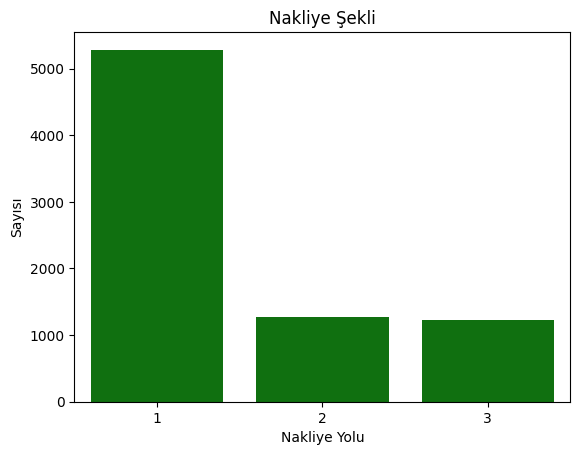

In [35]:
sns.countplot(x=shipping["Mode_of_Shipment"],data=shipping,color="green")
plt.title("Nakliye Şekli")
plt.xlabel("Nakliye Yolu")
plt.ylabel("Sayısı")
plt.show()

Şirketimizi ürünlerini taşıma olarak en çok deniz taşımacılığını kullamakla beraber kara ve hava yolu eşit bir şekilde tercihler arasında olduğunu görüyoruz.

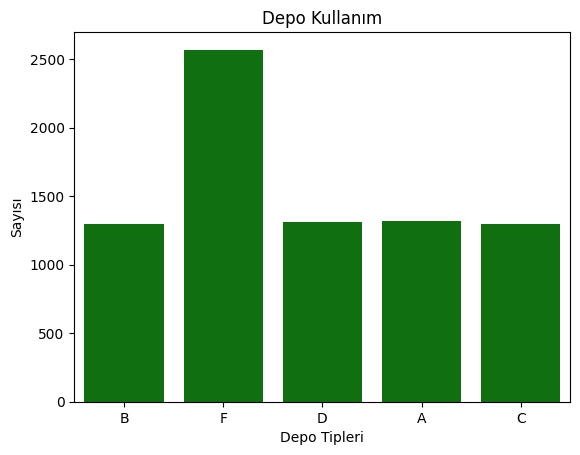

In [13]:
sns.countplot(x=shipping["Warehouse_block"],data=shipping,color="green")
plt.xlabel("Depo Tipleri")
plt.ylabel("Sayısı")
plt.title("Depo Kullanım")
plt.show()

Ürünlerin genelde F tipi blok depolarda tutlduğunun görmekteyiz buna istina diğer bloklarda eşit miktarda ürünleri depolamaktadır.

<ipython-input-14-8a4151f726fc>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  sns.boxplot(x="Prior_purchases",y="Discount_offered",hue="Gender",data=shipping,color="green")


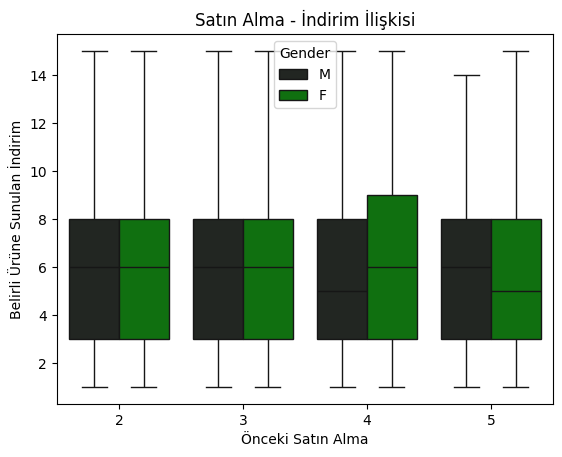

In [14]:
sns.boxplot(x="Prior_purchases",y="Discount_offered",hue="Gender",data=shipping,color="green")
plt.title("Satın Alma - İndirim İlişkisi")
plt.xlabel("Önceki Satın Alma")
plt.ylabel("Belirli Ürüne Sunulan İndirim")
plt.show()

Önceki satın alınanlar ile buna karşı sunulan indirim ilişkisi. Bu ilişkide 2 kez satın alan erkek ve kadın a 6 ile 8 dolar arası bir indirim sunulmuş , aynı şey 3 kez satın alan kişiler içinde geçerlidir. 4 kez satın alan erkekler 5 ile 8 dolar , kadınlar ise 6 ile 8.5 dolar arası bir indirim sunulduğunu görüyoruz. 5 kez satın alanlar ise erkeklerde 6 ile 8 dolara yakın , kadınlar da  ise 5 dolarlarda 8 dolara yakın bir indirim olduğunu görüyoruz.

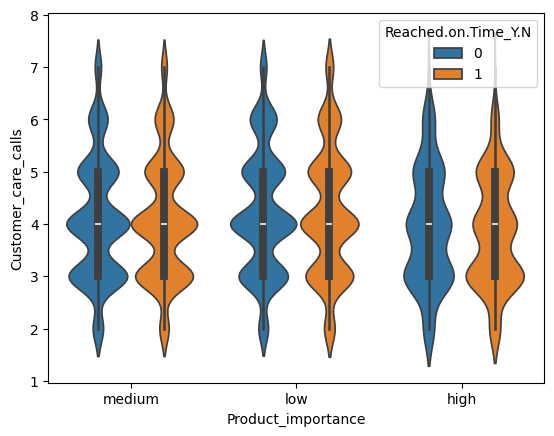

In [15]:
sns.violinplot(x="Product_importance",y="Customer_care_calls",hue="Reached.on.Time_Y.N",data=shipping)
plt.show()

Ürünlerin önemi ve müşteri aramalarını görüyoruz ve bunların zamanında ulaşılıp veya ulaşılmadığına göre değerlendiriyoruz.Düşük öncellikli ürünlerin zamanında ulaşılmadığınında arama sayılarının 3 ve 5 arası olduğunu görüyoruz genelde 4 lerde fazla olduğu. zamanında ulaşıldığı ise aynı 3 ve 5 arasıdır. Orta derece ürünler de ayın düşük öncelikli ürünler gibi olduğunu görüyoruz. Yükseklerde ise zamanında ulaşılmayanlar için 3 ile 6 arası bir arama olduğu ve zamanında ulaşması ise 2 ye yakın ve 5 arası olduğunu görüyoruz.

In [16]:
sns.histplot(x="Customer_care_calls",data=shipping)
plt.xlabel("Müşteri Arama")
plt.title("Arama")
plt.show()

Müşteri aramalarının en fazla 4 kez , ardından 3 kez  en sonda 7 kez arayan kişiler olduğunu görüyoruz.

In [17]:
sns.histplot(x="Cost_of_the_Product",kde=True,data=shipping)
plt.xlabel("Ürün Maliyeti")
plt.title("Maliyet")
plt.show()

Ürünlerin maliyetlerinin 100 dolar ile 300 dolar arası olduğunu görüyoruz ve 150 ile 250 dolar arası bir ivme yani satışlar da yoğunluk olduğunu görüyoruz.

Makine Öğrenmesi

In [20]:
shipping.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7794 entries, 3 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   7794 non-null   int64 
 1   Warehouse_block      7794 non-null   object
 2   Mode_of_Shipment     7794 non-null   object
 3   Customer_care_calls  7794 non-null   int64 
 4   Customer_rating      7794 non-null   int64 
 5   Cost_of_the_Product  7794 non-null   int64 
 6   Prior_purchases      7794 non-null   int64 
 7   Product_importance   7794 non-null   object
 8   Gender               7794 non-null   object
 9   Discount_offered     7794 non-null   int64 
 10  Weight_in_gms        7794 non-null   int64 
 11  Reached.on.Time_Y.N  7794 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 791.6+ KB


Makine öğrenmesi bölümüne geldiğimiz için ilk önce veri setimin tiplerini kontrol ediyor ve bağımlı ve bağımsız değişkenlerimi ayırıyorum.Bildiğiniz üzere makineler sayısal değerler üzerine çalışırlar o yüzden bizler veri setlerimizde bulunan object , category değerlermizi sayısala dönüştürmemiz lazım...

In [18]:

shipping = shipping.drop(["ID"],axis=1)

print(shipping.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7794 entries, 3 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      7794 non-null   object
 1   Mode_of_Shipment     7794 non-null   object
 2   Customer_care_calls  7794 non-null   int64 
 3   Customer_rating      7794 non-null   int64 
 4   Cost_of_the_Product  7794 non-null   int64 
 5   Prior_purchases      7794 non-null   int64 
 6   Product_importance   7794 non-null   object
 7   Gender               7794 non-null   object
 8   Discount_offered     7794 non-null   int64 
 9   Weight_in_gms        7794 non-null   int64 
 10  Reached.on.Time_Y.N  7794 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 730.7+ KB
None


Burada kullanacağım modele gçre işimize yaramayacak olan bazı sütunlar vardır. O yüzden bunları silmek bizim için iyi olabilir.

In [19]:
shipping["Warehouse_block"] = shipping["Warehouse_block"].map({"F":1 ,"A":2,"B":3,"C":4,"D":5})

shipping["Mode_of_Shipment"] = shipping["Mode_of_Shipment"].map({"Ship":1 ,"Flight":2,"Road":3})

shipping["Product_importance"] = shipping["Product_importance"].map({"low":1 ,"medium":2,"high":3})

shipping["Gender"] = shipping["Gender"].map({"F":1 ,"M":2})

print(shipping.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7794 entries, 3 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Warehouse_block      7794 non-null   int64
 1   Mode_of_Shipment     7794 non-null   int64
 2   Customer_care_calls  7794 non-null   int64
 3   Customer_rating      7794 non-null   int64
 4   Cost_of_the_Product  7794 non-null   int64
 5   Prior_purchases      7794 non-null   int64
 6   Product_importance   7794 non-null   int64
 7   Gender               7794 non-null   int64
 8   Discount_offered     7794 non-null   int64
 9   Weight_in_gms        7794 non-null   int64
 10  Reached.on.Time_Y.N  7794 non-null   int64
dtypes: int64(11)
memory usage: 730.7 KB
None


Sayısal olmayan değişkenleri sayısal ifadelere dönüştürüyorum ve bunu da map ifadesiyle yapıyorum.

In [20]:
y= shipping["Reached.on.Time_Y.N"]

X = shipping.drop("Reached.on.Time_Y.N",axis=1)


y bağımlı değişkenim olduğu için ona atama yapıyorum ve değişkenlerim arasında olan bağımlı değişkenimi silme işlemi yapıyorum.

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


Modelim için eğitim ve test kısımlarıa bölme işlemi yaptığım bölümdeyiz.

In [27]:

model = LogisticRegression(max_iter=10000,solver="lbfgs")

model.fit(X_train,y_train)


LogisticRegression(max_iter=100000)

Ardından modelimizi oluşturup max_iter ile modelimize bunu kaç kez öğrenmesi ile ilgili bir ifade verdik , ardından model.fit ile de modelimizi eğittik.

In [28]:

y_pred = model.predict(X_test)

basari = accuracy_score(y_test,y_pred)

print(basari)

0.5549380076955964


Modelimizi doğruluğu ölçüldüğü yerdir.

In [24]:

tahminDegerleri = pd.DataFrame({


    "Warehouse_block": [1],

    "Mode_of_Shipment" : [1],

    "Customer_care_calls" : [2],

    "Customer_rating" : [3],

    "Cost_of_the_Product" : [500],

    "Prior_purchases" : [1],

     "Product_importance":[2],

    "Gender":[2],

    "Discount_offered" : [15],

    "Weight_in_gms": [800]


})


In [25]:
tahmin = model.predict(tahminDegerleri)

print("Tahmini Değeri", tahmin)


Tahmini Değeri [1]
